# 時系列解析5
https://qiita.com/mix_dvd/items/ecfa6f0038e39cdce57e

In [1]:
import pandas as pd

%matplotlib inline

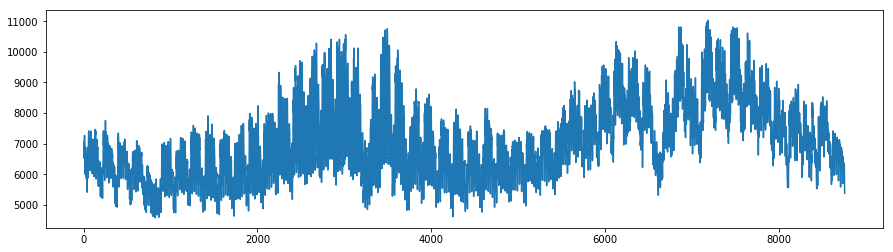

In [2]:
df_kw = pd.read_csv("juyo-2017.csv",encoding="Shift_JIS",skiprows=1)
df_kw["MW"] = df_kw["実績(万kW)"] * 10

df_kw["DATETIME"] = df_kw.index.map(lambda x: pd.to_datetime(df_kw.DATE[x] + " " + df_kw.TIME[x]))

# 可視化
df_kw["MW"].plot(figsize=(15,4))

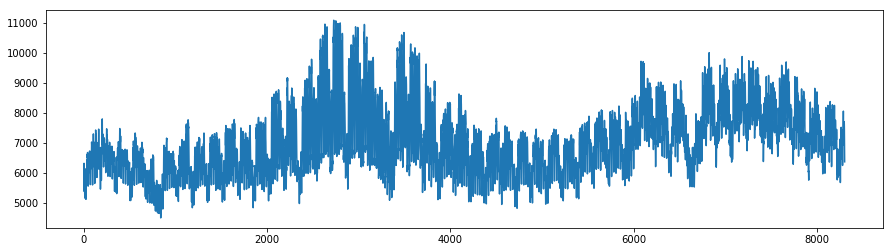

In [3]:
df_kw_18 = pd.read_csv("juyo-2018.csv",encoding="Shift_JIS",skiprows=1)
df_kw_18["MW"] = df_kw_18["実績(万kW)"] * 10

df_kw_18["DATETIME"] = df_kw_18.index.map(lambda x: pd.to_datetime(df_kw_18.DATE[x] + " " + df_kw_18.TIME[x]))

# 可視化
df_kw_18["MW"].plot(figsize=(15,4))

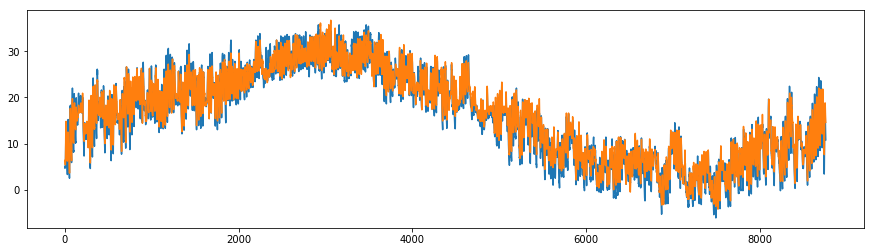

In [4]:
def read_temp(filename):
    df_temp = pd.read_csv(filename,encoding="Shift_JIS",skiprows=4)
    df_temp.columns = ["DATETIME","TEMP","品質情報","均質番号"]
    df_temp.DATETIME = df_temp.DATETIME.map(lambda _: pd.to_datetime(_))
    return df_temp

# 岡山
df_temp_okym = read_temp("data_okayama-2017.csv")
df_temp_okym.rename(columns = {'TEMP':'TEMP_okym'}, inplace=True)

# 広島
df_temp_hrsm = read_temp("data_hiroshima-2017.csv")
df_temp_hrsm.rename(columns = {'TEMP':'TEMP_hrsm'}, inplace=True)

# 可視化
df_temp_okym.TEMP_okym.plot(figsize=(15,4))
df_temp_hrsm.TEMP_hrsm.plot(figsize=(15,4))

In [5]:
len(df_temp_okym), len(df_temp_hrsm),len(df_kw)

(8760, 8760, 8760)

In [6]:
# データの複製
df = df_kw.copy()
# 岡山の気温を結合
df = df.merge(df_temp_okym,how="inner", on="DATETIME")
# 広島の気温を結合
df = df.merge(df_temp_hrsm,how="inner", on="DATETIME")

# 月、週、時間の値を個別に取得
df["MONTH"] = df.DATETIME.map(lambda _: _.month)
df["WEEK"] = df.DATETIME.map(lambda _: _.weekday())
df["HOUR"] = df.DATETIME.map(lambda _: _.hour)

In [7]:
df = df.dropna()

In [8]:
df

,DATE,TIME,実績(万kW),MW,DATETIME,TEMP_okym,品質情報_x,均質番号_x,TEMP_hrsm,品質情報_y,均質番号_y,MONTH,WEEK,HOUR
0,2017/4/1,1:00,660,6600,2017-04-01 01:00:00,4.7,8,1,6.3,8,1,4,5,1
1,2017/4/1,2:00,685,6850,2017-04-01 02:00:00,4.8,8,1,6.4,8,1,4,5,2
2,2017/4/1,3:00,706,7060,2017-04-01 03:00:00,4.9,8,1,6.2,8,1,4,5,3
3,2017/4/1,4:00,696,6960,2017-04-01 04:00:00,5.1,8,1,6.0,8,1,4,5,4
4,2017/4/1,5:00,667,6670,2017-04-01 05:00:00,5.0,8,1,5.8,8,1,4,5,5
5,2017/4/1,6:00,665,6650,2017-04-01 06:00:00,4.8,8,1,5.4,8,1,4,5,6
6,2017/4/1,7:00,662,6620,2017-04-01 07:00:00,5.1,8,1,5.5,8,1,4,5,7
7,2017/4/1,8:00,689,6890,2017-04-01 08:00:00,6.5,8,1,6.1,8,1,4,5,8
8,2017/4/1,9:00,727,7270,2017-04-01 09:00:00,8.1,8,1,8.1,8,1,4,5,9
9,2017/4/1,10:00,680,6800,2017-04-01 10:00:00,9.9,8,1,9.8,8,1,4,5,10


In [9]:
cols = ["MONTH","WEEK","HOUR"]
for col in cols:
    df = df.join(pd.get_dummies(df[col], prefix=col))

In [10]:
df

,DATE,TIME,実績(万kW),MW,DATETIME,TEMP_okym,品質情報_x,均質番号_x,TEMP_hrsm,品質情報_y,...,HOUR_14,HOUR_15,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21,HOUR_22,HOUR_23
0,2017/4/1,1:00,660,6600,2017-04-01 01:00:00,4.7,8,1,6.3,8,...,0,0,0,0,0,0,0,0,0,0
1,2017/4/1,2:00,685,6850,2017-04-01 02:00:00,4.8,8,1,6.4,8,...,0,0,0,0,0,0,0,0,0,0
2,2017/4/1,3:00,706,7060,2017-04-01 03:00:00,4.9,8,1,6.2,8,...,0,0,0,0,0,0,0,0,0,0
3,2017/4/1,4:00,696,6960,2017-04-01 04:00:00,5.1,8,1,6.0,8,...,0,0,0,0,0,0,0,0,0,0
4,2017/4/1,5:00,667,6670,2017-04-01 05:00:00,5.0,8,1,5.8,8,...,0,0,0,0,0,0,0,0,0,0
5,2017/4/1,6:00,665,6650,2017-04-01 06:00:00,4.8,8,1,5.4,8,...,0,0,0,0,0,0,0,0,0,0
6,2017/4/1,7:00,662,6620,2017-04-01 07:00:00,5.1,8,1,5.5,8,...,0,0,0,0,0,0,0,0,0,0
7,2017/4/1,8:00,689,6890,2017-04-01 08:00:00,6.5,8,1,6.1,8,...,0,0,0,0,0,0,0,0,0,0
8,2017/4/1,9:00,727,7270,2017-04-01 09:00:00,8.1,8,1,8.1,8,...,0,0,0,0,0,0,0,0,0,0
9,2017/4/1,10:00,680,6800,2017-04-01 10:00:00,9.9,8,1,9.8,8,...,0,0,0,0,0,0,0,0,0,0


In [11]:
x_cols = ["TEMP_okym","TEMP_hrsm"] + df.columns.tolist()[14:]

X = df[x_cols]
y = df["MW"]

# ラベル付きデータをトレーニングセット (X_train, y_train)とテストセット (X_test,y_test)に分割
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.2, random_state=42)

# 正規化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Keras読込
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam

adam = Adam(lr=0.001)

# モデル生成用関数
def reg_model():

    reg = Sequential()

    reg.add(Dense(10, input_dim=len(x_cols), activation='relu'))
    reg.add(Dense(16, activation='relu'))
    reg.add(Dense(1))

    reg.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])
    reg.summary()

    return reg

# モデルの取得
model = KerasRegressor(build_fn=reg_model, epochs=200, batch_size=16, verbose=1)

# 学習
model.fit(X_train, y_train)

# スコア（参考値）
model.score(X_test, y_test)


/Users/mitsuhiro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/mitsuhiro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                460       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                176       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 653
Trainable params: 653
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
7007/7007 [==============================] - 1s 101us/step - loss: 51452522.4256 - acc: 0.0000e+00
Epoch 2/200
7007/7007 [==============================] - 0s 64us/step - loss: 44365903.7494 - acc: 0.0000e+00
Epoch 3/200
7007/7007 [==============================] - 0s 64us/step - loss: 26261189.2572 - acc: 0.0000e+00
Epoch 4/200
7007/7007 [==============================] - 0s 64us/step - loss:

-146185.18056150115

1752/1752 [==============================] - 0s 29us/step
KERAS REG RMSE : 382.34


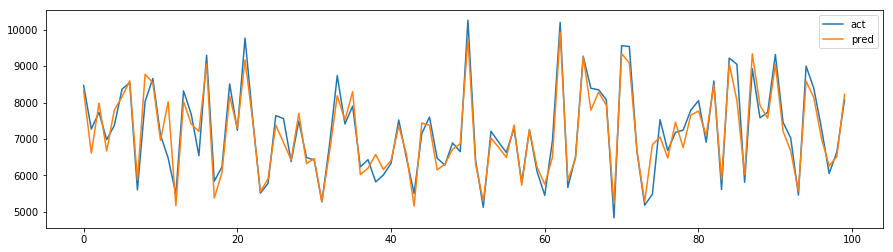

In [12]:
# 二乗平方根で誤差を算出
from sklearn.metrics import mean_squared_error

# 予測値の取得
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("KERAS REG RMSE : %.2f" % (mse ** 0.5))

# 可視化
pd.DataFrame({"pred":y_pred, "act":y_test})[:100].reset_index(drop=True).plot(figsize=(15,4))

744/744 [==============================] - 0s 23us/step
KERAS REG RMSE : 356.17


/Users/mitsuhiro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:44: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/mitsuhiro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:45: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


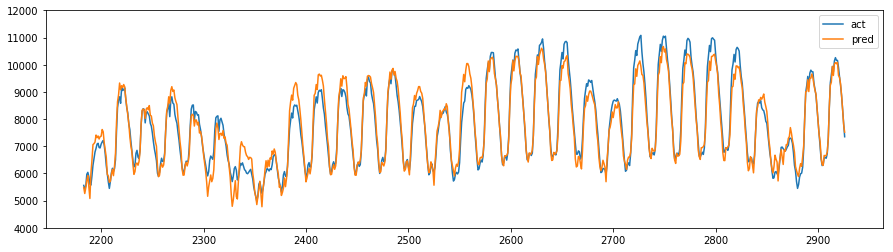

In [13]:
# 電力データを読込
df_kw = pd.read_csv("juyo-2018.csv",encoding="Shift_JIS",skiprows=1)

# 岡山のデータを読込
df_temp_okym = read_temp("data_okayama-2018.csv")
df_temp_okym.rename(columns = {'TEMP':'TEMP_okym'}, inplace=True)

# 広島のデータを読込
df_temp_hrsm = read_temp("data_hiroshima-2018.csv")
df_temp_hrsm.rename(columns = {'TEMP':'TEMP_hrsm'}, inplace=True)

# データ加工
df_kw.columns = ["DATE","TIME","万kW"]
df_kw["MW"] = df_kw["万kW"] * 10
df_kw["DATETIME"] = df_kw.index.map(lambda _: pd.to_datetime(df_kw.DATE[_] + " " + df_kw.TIME[_]))

# データ結合
df = df_kw.copy()
df = df.merge(df_temp_okym,how="inner", on="DATETIME")
df = df.merge(df_temp_hrsm,how="inner", on="DATETIME")

# 追加データ作成
df["MONTH"] = df.DATETIME.map(lambda _: _.month)
df["WEEK"] = df.DATETIME.map(lambda _: _.weekday())
df["HOUR"] = df.DATETIME.map(lambda _: _.hour)

# 欠損データ削除
df = df.dropna()

# One-hotエンコーディング
cols = ["MONTH","WEEK","HOUR"]
for col in cols:
    df = df.join(pd.get_dummies(df[col], prefix=col))

# テストデータの不足分を補完
for col in x_cols[2:]:
    if not col in df.columns:
        df[col] = 0

# 7月の電力使用量を予測
df_pred = df[df.MONTH==7]

# 予測用データ
X = df_pred[x_cols].as_matrix().astype('float64')
y = df_pred["MW"].as_matrix().astype('int').flatten()

# 正規化
X = scaler.transform(X)

# 予測値の取得
y_pred = model.predict(X)

# 二乗平方根で誤差を算出
mse = mean_squared_error(y, y_pred)
print("KERAS REG RMSE : %.2f" % (mse ** 0.5))

# 可視化
pd.DataFrame({"pred":y_pred, "act":y}, index=df_pred.index).plot(figsize=(15,4),ylim=(4000,12000))